# Problem 2 - Answers

**Investigating binary collision cross sections**

Use the `collide` function defined in Problem 1, with the same set of physical and simulation parameters. Amend this function so that instead of returning the alpha trajectories, it instead returns the cosine of the scattering angle (the angle between the initial and final velocities of the particle). 

In [1]:
%matplotlib inline
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

# Define constants
q1 = constants.e * 79  # Large nucleus charge
q2 = constants.e * 2   # Small nuclear charge
m = 6.64424e-27       # Small nucleus mass
v0 = 1e7              # Initial velocity
sd = 1e-12            # Size of simulation domain (in z axis)
dt = 1e-22            # Simulation time step

# Define a Coulomb potential
def Coulomb(r,Q,q):
    return Q*q/(4*np.pi*constants.epsilon_0*np.linalg.norm(r)**3) * r

# Define a function to simulate ion trajectory
# The np.vectorize decorator allows evaluation of 
#    the function over a numpy array input
@np.vectorize
def collide(b,R,Q):
    r = np.array([b,0.0,-sd])
    v = np.array([0.0,0.0,v0])
    
    exited = False
    while not exited:
        v += dt * Coulomb(r,Q,q2) / m
        r += dt * v
        if np.abs(r[2]) > sd:
            exited = True
        elif np.linalg.norm(r) <= R:
            n = r / np.linalg.norm(r)
            v = v - 2*np.dot(v,n)*n
            
    # Calculate cosine of angle between initial and final velocities
    costheta = np.dot(v,np.array([0.0,0.0,1.0])) / np.linalg.norm(v)
    return costheta

## Hard-sphere collisions

a) Use the `collide` function to evaluate the cosine of the scattering angle that results from simulating hard sphere scattering across a range of impact parameters. Plot the scattering angle as a function of impact parameter.

Text(0, 0.5, '$\\theta$')

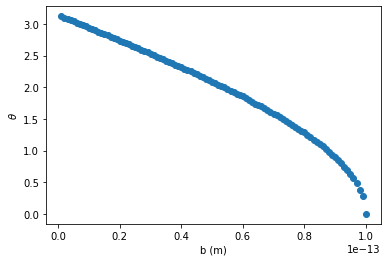

In [2]:
# define impact parameter range
bs = np.linspace(1e-15,1e-13,100)

# calculate cosines of scattering angles
ct = collide(bs,1e-13,0.0)

# convert from cosines to angles
theta = np.arccos(ct)

plt.plot(bs,theta,'o')
plt.xlabel('b (m)')
plt.ylabel(r'$\theta$')

b) One often considers the differential cross section $\frac{d\sigma}{d\Omega}$, relating the differential solid angle $d\Omega$ into which particles in the differential cross section $d\sigma$ are scattered. This can clearly be related to our known parameters: the impact parameter $b$ and scattering angle $\theta$. Take as given the relation for a radially symmetric scattering potential:

$$ \frac{d\sigma}{d\Omega} = \frac{b}{\sin\theta}\left|\frac{db}{d\theta}\right| $$

Plot the differential cross section for hard sphere scattering against the cosine of the scattering angle. You will know from your notes that this kind of scattering should be isotropic - do you get a uniform distribution? If not, can you convince yourself that any departure from uniformity is a numerical artefact? Try fiddling with simulation parameters and note the effect.

C:\Users\Lloyd\anaconda3\envs\dscore\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, '$d\\sigma/d\\Omega$')

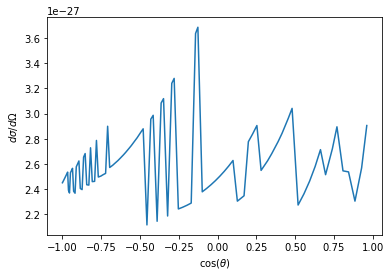

In [3]:
# Calculate d sigma / d Omega

dsdo = bs / np.sin(theta) * np.abs(np.gradient(bs,theta))
plt.plot(ct,dsdo)
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$d\sigma/d\Omega$')

We see that this is not quite a uniform profile. What happens if we decrease the timestep of the simulation?

C:\Users\Lloyd\anaconda3\envs\dscore\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Text(0, 0.5, '$d\\sigma/d\\Omega$')

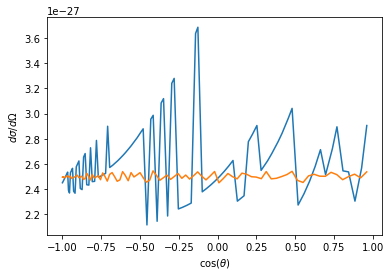

In [4]:
dt = 1e-23
ct2 = collide(bs,1e-13,0.0)
theta2 = np.arccos(ct2)
dsdo2 = bs / np.sin(theta2) * np.abs(np.gradient(bs,theta2))
plt.plot(ct,dsdo)
plt.plot(ct2,dsdo2)
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$d\sigma/d\Omega$')

We see that decreasing the timestep of the simulation makes the distribution more uniform. So it is reasonable to conclude that the variance in the differential cross section is a numerical artefact. 

a) Repeat the procedure you followed for hard sphere scattering, for the case of Rutherford scattering. Produce plots of the scattering angle as a function of impact parameter and of the differential cross section for hard sphere scattering against the cosine of the scattering angle. 

A theoretical derivation of the differential cross section for Rutherford scattering gives:

$$ \frac{d\sigma}{d\Omega} = \left(\frac{Qq}{8\pi\epsilon_0mv_0^2\sin^2(\theta/2)}\right)^2 $$

How does this compare to your numerical results?

Text(0, 0.5, '$\\theta$')

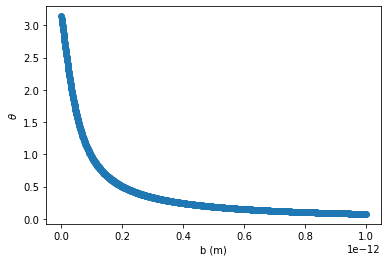

In [5]:
# Calculate the scattering angle for various impact parameters
dt = 1e-22
bs = np.linspace(0.0,1e-12,1000)
ct = collide(bs,0.0,q1)
theta = np.arccos(ct)
plt.plot(bs,theta,'o')
plt.xlabel('b (m)')
plt.ylabel(r'$\theta$')

Text(0, 0.5, '$d\\sigma/d\\Omega$')

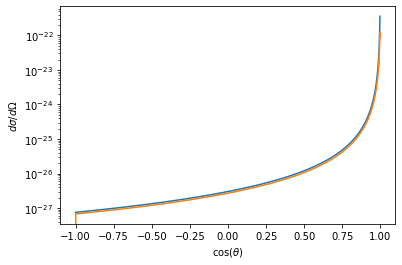

In [6]:
# Compare the differential cross section to the theoretical expression
dsdo = bs / np.sin(theta) * np.abs(np.gradient(bs,theta))
plt.plot(ct,(q1*q2/(8*np.pi*constants.epsilon_0*m*v0**2*np.sin(theta/2.0)**2))**2)
plt.plot(ct,dsdo)
plt.yscale('log')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$d\sigma/d\Omega$')

Clearly there is good agreement between the theoretical and numerical results.

## Mixed Scattering

Repeat the above procedure, for the case of a charged hard sphere. Use a range of sphere radii (such as $1.5\times10^{-13}$m, $3\times10^{-13}$m, and $6\times10^{-13}$m) and each case produce plots of the scattering angle as a function of impact parameter and of the differential cross section for hard sphere scattering against the cosine of the scattering angle. In each case the sphere should have charge of a Gold nucleus. What do you find?

Text(0, 0.5, '$\\theta$')

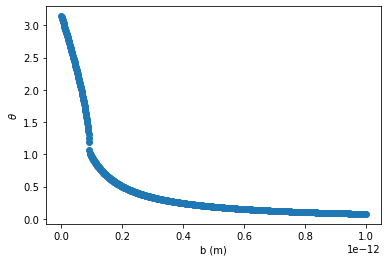

In [7]:
# R = 1.5e-13

bs = np.linspace(0.0,1e-12,1000)
ct = collide(bs,1.5e-13,q1)
theta = np.arccos(ct)
plt.plot(bs,theta,'o')
plt.xlabel('b (m)')
plt.ylabel(r'$\theta$')

Text(0, 0.5, '$d\\sigma/d\\Omega$')

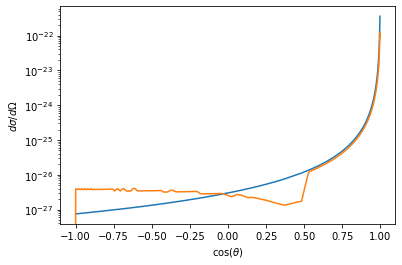

In [8]:
dsdo = bs / np.sin(theta) * np.abs(np.gradient(bs,theta))
fig,ax = plt.subplots()
ax.plot(ct,(q1*q2/(8*np.pi*constants.epsilon_0*m*v0**2*np.sin(theta/2.0)**2))**2)
ax.plot(ct,dsdo)
ax.set_yscale('log')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$d\sigma/d\Omega$')

Text(0, 0.5, '$\\theta$')

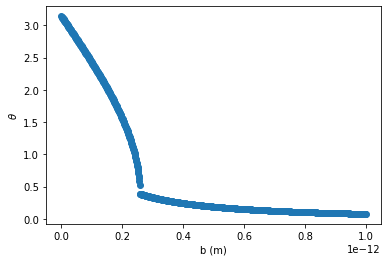

In [9]:
# R = 3-13

bs = np.linspace(0.0,1e-12,1000)
ct = collide(bs,3e-13,q1)
theta = np.arccos(ct)
plt.plot(bs,theta,'o')
plt.xlabel('b (m)')
plt.ylabel(r'$\theta$')

Text(0, 0.5, '$d\\sigma/d\\Omega$')

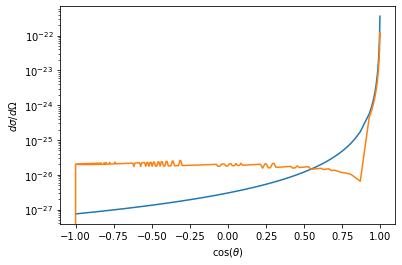

In [10]:
dsdo = bs / np.sin(theta) * np.abs(np.gradient(bs,theta))
fig,ax = plt.subplots()
ax.plot(ct,(q1*q2/(8*np.pi*constants.epsilon_0*m*v0**2*np.sin(theta/2.0)**2))**2)
ax.plot(ct,dsdo)
ax.set_yscale('log')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$d\sigma/d\Omega$')

Text(0, 0.5, '$\\theta$')

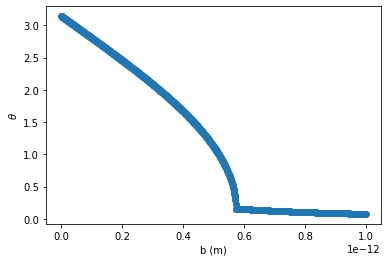

In [11]:
# # R = 6e-13

bs = np.linspace(0.0,1e-12,1000)
ct = collide(bs,6e-13,q1)
theta = np.arccos(ct)
plt.plot(bs,theta,'o')
plt.xlabel('b (m)')
plt.ylabel(r'$\theta$')

Text(0, 0.5, '$d\\sigma/d\\Omega$')

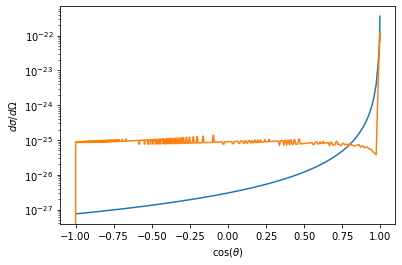

In [12]:
dsdo = bs / np.sin(theta) * np.abs(np.gradient(bs,theta))
fig,ax = plt.subplots()
ax.plot(ct,(q1*q2/(8*np.pi*constants.epsilon_0*m*v0**2*np.sin(theta/2.0)**2))**2)
ax.plot(ct,dsdo)
ax.set_yscale('log')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$d\sigma/d\Omega$')

We see that as the radius of the hard sphere surface gets larger, our cross section changes from resembling the Rutherford scattering cross section, to resembling the uniform hard sphere scattering cross section. This effect is most pronounced for small impact parameters.